In [1]:
from IPython.core.pylabtools import figsize
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy as sp
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Data

In [ ]:
loans = pd.read_excel("/users/sivajansiva/documents/ipython/Coursera/Loan_Data/loan-data.xlsx")

In [4]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [5]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x == 0 else -1)
loans[['safe_loans']]

,safe_loans
0,1
1,-1
2,1
3,1
4,1
5,1
6,-1
7,-1
8,1
9,1


In [6]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]
targets = 'safe_loans'

In [7]:
loans = loans[features + [targets]]
loans.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,1


In [8]:
#loans.to_excel("/users/sivajansiva/documents/ipython/Coursera/Machine Learning for Data Analysis/loan-data.xlsx")

# Data Cleaning

In [9]:
safe_loans_raw = loans[loans['safe_loans'] == 1]
risky_loans_raw = loans[loans['safe_loans'] == -1]
print ("Number of safe loans  : %s" % len(safe_loans_raw))
print ("Number of risky loans : %s" % len(risky_loans_raw))

Number of safe loans  : 99457
Number of risky loans : 23150


In [10]:
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
percentage

0.2327639080205516

In [11]:
risky_loans = risky_loans_raw
risky_loans_size = risky_loans.shape[0]
risky_loans_size

23150

In [12]:
safe_loans = safe_loans_raw[:risky_loans_size]

In [13]:
loan_data = risky_loans.append(safe_loans)

In [14]:
#loan_data.describe()

In [15]:
loans_numeric_features = loan_data.select_dtypes(include=['float64', 'int64', 'int32','float32'])

In [16]:
loans_cat = loan_data.select_dtypes(include=['O'])

In [17]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
loans_cat_encoded = loans_cat.apply(LabelEncoder().fit_transform)

In [18]:
loans_cat_encoded.head()

,grade,sub_grade,home_ownership,purpose,term
1,2,13,3,0,1
6,5,26,2,9,1
7,1,9,3,8,1
10,2,10,3,2,0
12,1,6,3,8,0


In [19]:
loan_data = loans_cat_encoded.join(loans_numeric_features)

In [20]:
loan_data = loan_data.iloc[np.random.permutation(len(loan_data))]

In [21]:
data_size = int(len(loan_data)*0.8)
train_data = loan_data[:data_size].reset_index(drop=True)
test_data = loan_data[data_size:].reset_index(drop=True)

In [22]:
train_data_x_array = train_data.ix[:,train_data.columns != 'safe_loans'].as_matrix()
train_data_y_array = np.array([train_data['safe_loans'].values]).T
test_data_x_array = test_data.ix[:,train_data.columns != 'safe_loans'].as_matrix()
test_data_y_array = np.array([test_data['safe_loans'].values]).T

In [23]:
#train_data_x = train_data_x.reset_index(drop=True)
#train_data

# Machine Learning Implementation

In [24]:
clf = RandomForestClassifier(max_depth=6)
clf.fit(train_data_x_array,train_data_y_array)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
clf.feature_importances_

array([  1.78407666e-01,   3.42941592e-01,   8.06767926e-04,
         1.45168812e-02,   4.29697597e-02,   2.11918100e-04,
         9.93104815e-03,   1.53678583e-01,   6.40816458e-03,
         1.66408810e-01,   5.25359407e-02,   3.11828686e-02])

In [26]:
100 - 100*clf.score(train_data_x_array,train_data_y_array)

28.658207343412528

([<matplotlib.axis.YTick at 0x116cdbe80>,
 <a list of 12 Text yticklabel objects>)

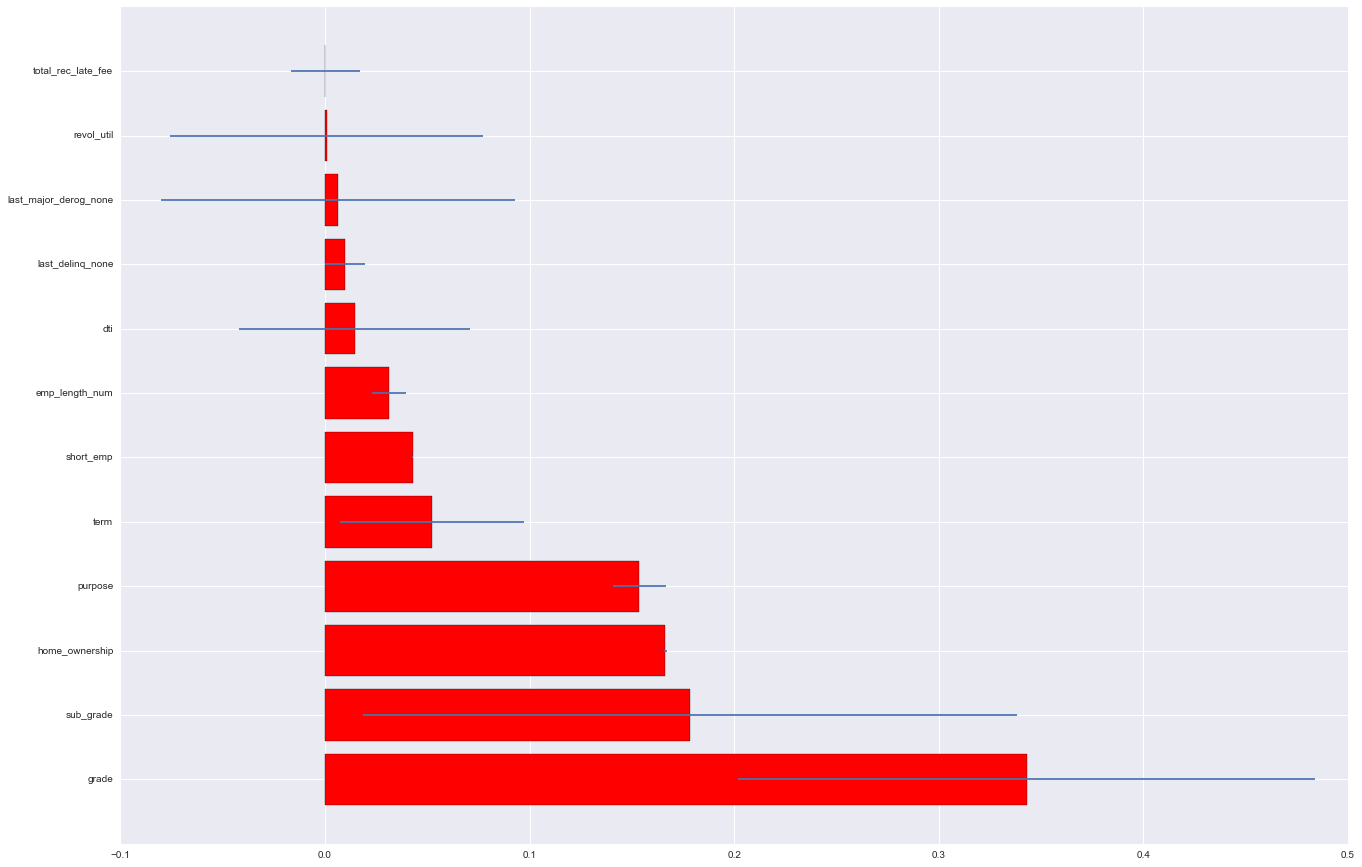

In [27]:
importance = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis = 0)
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(22,15))
plt.barh(range(train_data_x_array.shape[1]), importance[indices], xerr = std, color = "r", align = 'center')
plt.ylim(-1, train_data_x_array.shape[1])
#dict_predictors = ['grade', 'sub_grade', 'home_ownership', 'purpose', 'term', 'short_emp',
#       'emp_length_num', 'dti', 'last_delinq_none', 'last_major_derog_none',
#       'revol_util', 'total_rec_late_fee']
dict_predictors = [i for i in train_data.columns]
plt.yticks(range(train_data_x_array.shape[1]),dict_predictors)

# Prediction

In [28]:
test_safe_loans = test_data[test_data[targets] == 1]
test_risky_loans = test_data[test_data[targets] == -1]
sample_test_data_safe = test_safe_loans[0:2]
sample_test_data_risky = test_risky_loans[0:2]
sample_test_data = sample_test_data_safe.append(sample_test_data_risky)
sample_test_data1 = sample_test_data.ix[:,train_data.columns != 'safe_loans'] 
sample_test_data1

,grade,sub_grade,home_ownership,purpose,term,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,3,18,3,2,1,0,6,17.54,0,1,75.4,0.0
1,0,2,3,1,0,0,8,24.16,1,1,70.1,0.0
3,2,11,3,2,0,0,5,31.20,0,0,92.1,0.0
4,1,6,3,1,0,0,6,23.06,1,1,40.4,0.0


In [29]:
clf.predict(sample_test_data1)

array([-1,  1, -1,  1])

In [30]:
pd.DataFrame(clf.predict_proba(sample_test_data1),columns = ['Risky_loan_prob','Safe_loan_prob'])

,Risky_loan_prob,Safe_loan_prob
0,0.614026,0.385974
1,0.216245,0.783755
2,0.980909,0.019091
3,0.403461,0.596539


In [31]:
test_data_x = test_data.ix[:,test_data.columns != 'safe_loans']
clf.predict_proba(test_data_x).shape

(9260, 2)

In [32]:
test_data_x.shape

(9260, 12)